In [1]:
!pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix,f1_score
from sklearn.preprocessing import MinMaxScaler # to scale the numeric features
from imblearn.over_sampling import SMOTE #SMOTE technique to deal with unbalanced data problem
from sklearn.model_selection import cross_val_score,GridSearchCV #splitting the dataset into test-train

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('credit_scoring_eng.csv')

In [4]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)

In [5]:
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## EDA

In [6]:
df['days_employed'].isna().sum()

2174

In [7]:
df['total_income'].isna().sum()

2174

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
children,21525.0,0.538908,1.381587,-1.000000,0.000000,0.000000,1.000000,20.000000
days_employed,19351.0,63046.497661,140827.311974,-18388.949901,-2747.423625,-1203.369529,-291.095954,401755.400475
dob_years,21525.0,43.293380,12.574584,0.000000,33.000000,42.000000,53.000000,75.000000
education_id,21525.0,0.817236,0.548138,0.000000,1.000000,1.000000,1.000000,4.000000
family_status_id,21525.0,0.972544,1.420324,0.000000,0.000000,0.000000,1.000000,4.000000
debt,21525.0,0.080883,0.272661,0.000000,0.000000,0.000000,0.000000,1.000000
total_income,19351.0,26787.568355,16475.450632,3306.762000,16488.504500,23202.870000,32549.611000,362496.645000


In [9]:
df.duplicated().sum()

54

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df['days_employed'] = df['days_employed'].apply(lambda x: abs(x) if x < 0 else x)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
children,21471.0,0.539565,1.382978,-1.000000,0.000000,0.000000,1.000000,20.000000
days_employed,19351.0,66914.728907,139030.880527,24.141633,927.009265,2194.220567,5537.882441,401755.400475
dob_years,21471.0,43.279074,12.574291,0.000000,33.000000,42.000000,53.000000,75.000000
education_id,21471.0,0.817195,0.548508,0.000000,1.000000,1.000000,1.000000,4.000000
family_status_id,21471.0,0.973685,1.421082,0.000000,0.000000,0.000000,1.000000,4.000000
debt,21471.0,0.081086,0.272974,0.000000,0.000000,0.000000,0.000000,1.000000
total_income,19351.0,26787.568355,16475.450632,3306.762000,16488.504500,23202.870000,32549.611000,362496.645000


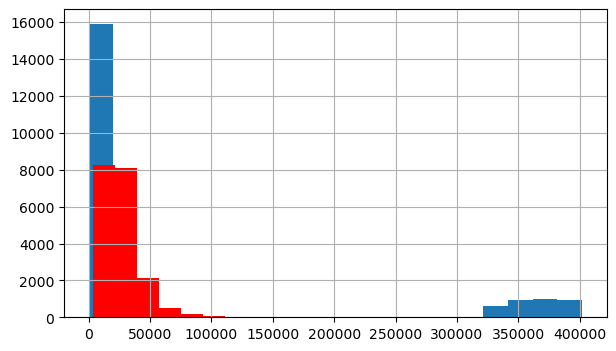

In [14]:
df.days_employed.hist(bins=20, figsize=(7,4))
df.total_income.hist(bins=20, figsize=(7,4), color='red')
plt.show()

In [15]:
df.isnull().sum()

children               0
days_employed       2120
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2120
purpose                0
dtype: int64

In [16]:
df.education

0          bachelor's degree
1        secondary education
2        Secondary Education
3        secondary education
4        secondary education
                ...         
21520    secondary education
21521    secondary education
21522    secondary education
21523    secondary education
21524    secondary education
Name: education, Length: 21471, dtype: object

In [17]:
income_mdn = df.groupby(['gender', 'education', 'family_status'])['total_income'].transform('median')
df['total_income'] = df['total_income'].fillna(income_mdn)

In [18]:
days_mdn = df.groupby(['family_status', 'education', 'gender'])['days_employed'].transform('median')
df['days_employed'] = df['days_employed'].fillna(days_mdn)

In [19]:
df.isnull().sum()

children            0
days_employed       1
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        1
purpose             0
dtype: int64

In [20]:
df.fillna(0, inplace=True)

In [21]:
df.isnull().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

In [22]:
df.dtypes

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

In [23]:
df = df.drop(['education_id', 'family_status_id', 'purpose'], axis=1)

In [24]:
df

,children,days_employed,dob_years,education,family_status,gender,income_type,debt,total_income
0,1,8437.673028,42,bachelor's degree,married,F,employee,0,40620.102
1,1,4024.803754,36,secondary education,married,F,employee,0,17932.802
2,0,5623.422610,33,Secondary Education,married,M,employee,0,23341.752
3,3,4124.747207,32,secondary education,married,M,employee,0,42820.568
4,0,340266.072047,53,secondary education,civil partnership,F,retiree,0,25378.572
...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary education,civil partnership,F,business,0,35966.698
21521,0,343937.404131,67,secondary education,married,F,retiree,0,24959.969
21522,1,2113.346888,38,secondary education,civil partnership,M,employee,1,14347.610
21523,3,3112.481705,38,secondary education,married,M,employee,1,39054.888


## Univariate Analysis

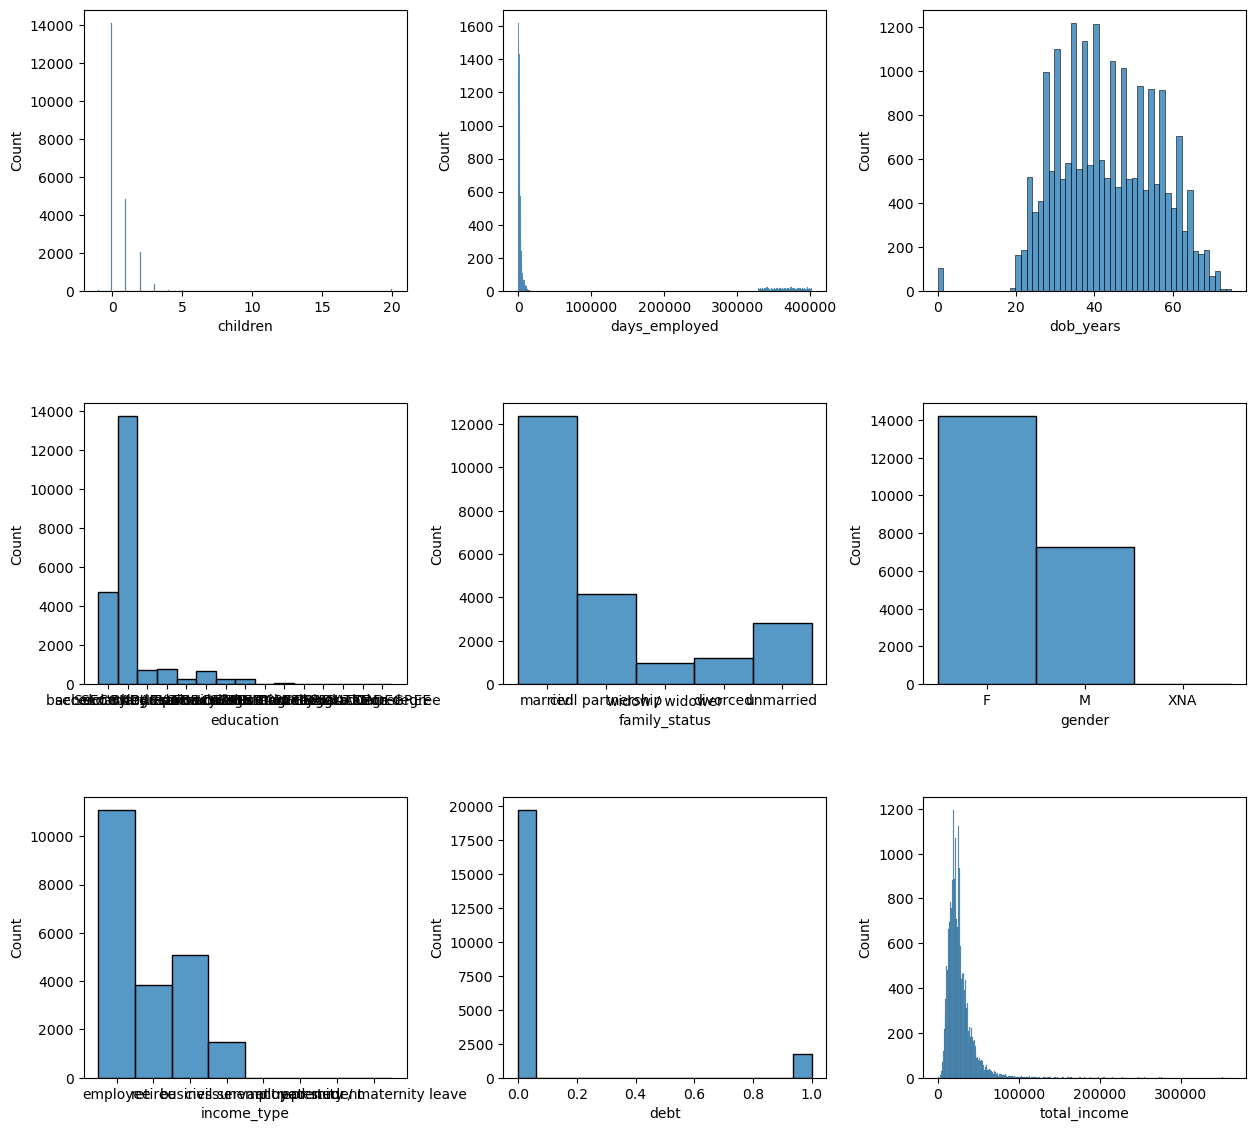

In [25]:
fig, ax = plt.subplots(3, 3, figsize=(15, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=0.3, hspace=0.4)
for variable, subplot in zip(df.columns, ax.flatten()):
    sns.histplot(df[variable], ax=subplot, palette = 'crest')

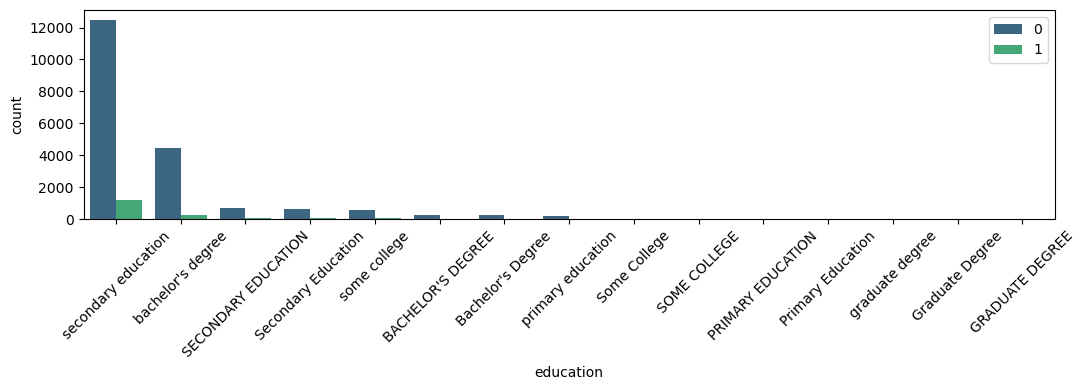

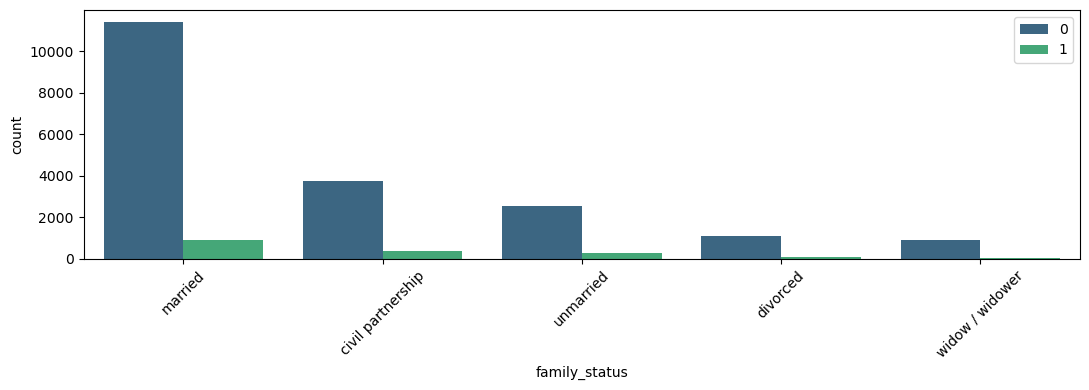

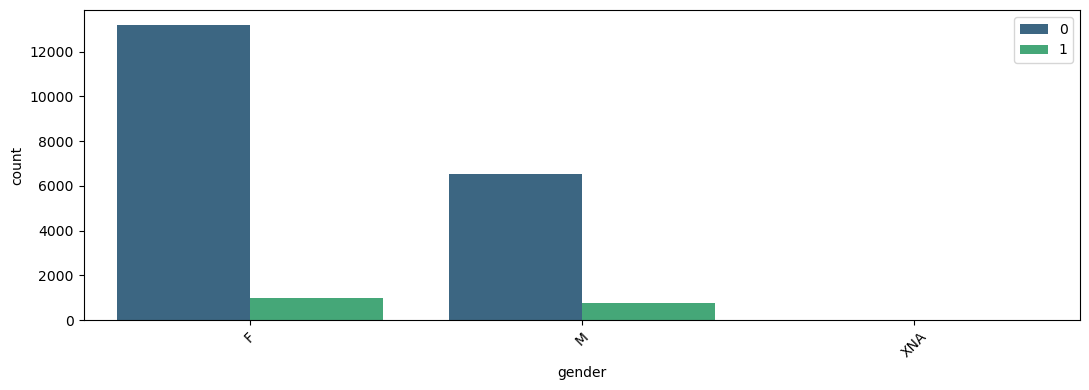

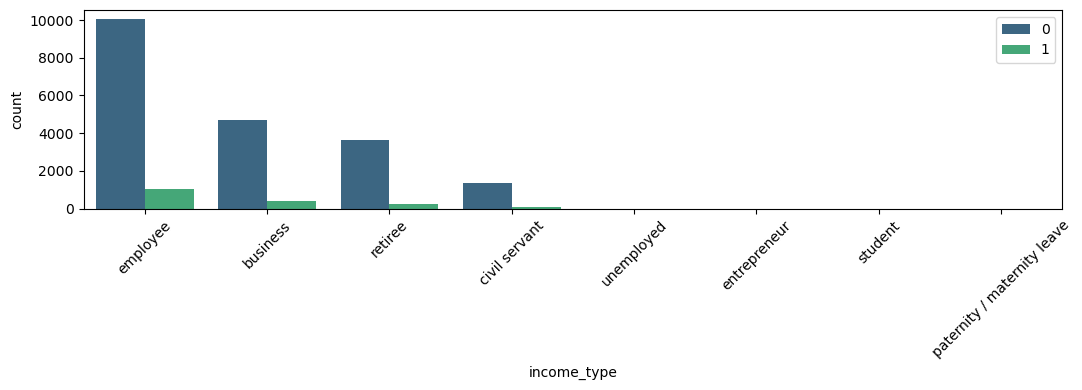

In [26]:
cat_variables = ["education","family_status", "gender","income_type"]
for i in cat_variables:
    fig_dims = (11, 4)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.countplot(x=i, hue="debt", ax=ax, data=df,palette="viridis",order=df[i].value_counts().index)
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

## Features Engineering

In [27]:
df['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [28]:
def replace_wrong_education(wrong_education, correct_education):
    for wrong_educ in wrong_education:
        df['education'] = df['education'].replace(wrong_educ, correct_education)

In [29]:
duplicates = ['BACHELOR\'S DEGREE', 'Bachelor\'s Degree']
name = 'bachelor\'s degree'
replace_wrong_education(duplicates, name)
duplicates = ['GRADUATE DEGREE', 'Graduate Degree']
name = "graduate degree"
replace_wrong_education(duplicates, name)
duplicates=['PRIMARY EDUCATION', 'Primary Education']
name = 'primary education'
replace_wrong_education(duplicates, name)
duplicates = ['SECONDARY EDUCATION', 'Secondary Education']
name = 'secondary education'
replace_wrong_education(duplicates, name)
duplicates = ['SOME COLLEGE', 'Some College']
name = 'some college'
replace_wrong_education(duplicates, name)

In [30]:
df['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

In [31]:
#primary - 1, secondary - 2, some college - 3, bachelors - 4, graduate - 5
df['education'] = df['education'].replace(
    ['bachelor\'s degree', 'secondary education', 'some college',
     'primary education', 'graduate degree'],
    ['4', '2', '3', '1', '5'])

In [32]:
df['education'] = df['education'].astype(int)

In [33]:
df.family_status.unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

In [34]:
df['family_status'] = df['family_status'].replace(["widow / widower", "widow"])

In [35]:
df.family_status.unique()

array(['married', 'civil partnership', 'divorced', 'unmarried'],
      dtype=object)

In [36]:
#married - 1, civil partnership - 2, divorced - 3, unmarried - 4
df['family_status'] = df['family_status'].replace(
    ['married', 'civil partnership',
     'divorced', 'unmarried'],
    ['1', '2', '3', '4'])

In [37]:
df['family_status'] = df['family_status'].astype(int)

In [38]:
df['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [39]:
df[df['gender'] == 'XNA']

,children,days_employed,dob_years,education,family_status,gender,income_type,debt,total_income
10701,0,2358.600502,24,3,2,XNA,business,0,32624.825


In [40]:
df = df.drop(labels=[10701], axis=0)

In [41]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

In [42]:
#F- 1, M -0
df['gender'] = df['gender'].replace(['F', 'M'], ['1', '0'])

In [43]:
df['gender'] = df['gender'].astype(int)

In [44]:
df['income_type'].unique()

array(['employee', 'retiree', 'business', 'civil servant', 'unemployed',
       'entrepreneur', 'student', 'paternity / maternity leave'],
      dtype=object)

In [45]:
df['income_type'] = df['income_type'].replace(["paternity / maternity leave", "leave"])

In [46]:
df['income_type'].unique()

array(['employee', 'retiree', 'business', 'civil servant', 'unemployed',
       'entrepreneur', 'student'], dtype=object)

In [47]:
#employee - 1, retiree - 2, business - 3, civil servant - 4, unemployed - 5, entreprenuer - 6, student - 7
df['income_type'] = df['income_type'].replace(
    ['employee', 'retiree', 'business', 'civil servant', 'unemployed', 'entrepreneur', 'student'],
    ['1', '2', '3', '4', '5', '6', '7'])

In [48]:
df['income_type'] = df['income_type'].astype(int)

In [49]:
df.dtypes

children           int64
days_employed    float64
dob_years          int64
education          int64
family_status      int64
gender             int64
income_type        int64
debt               int64
total_income     float64
dtype: object

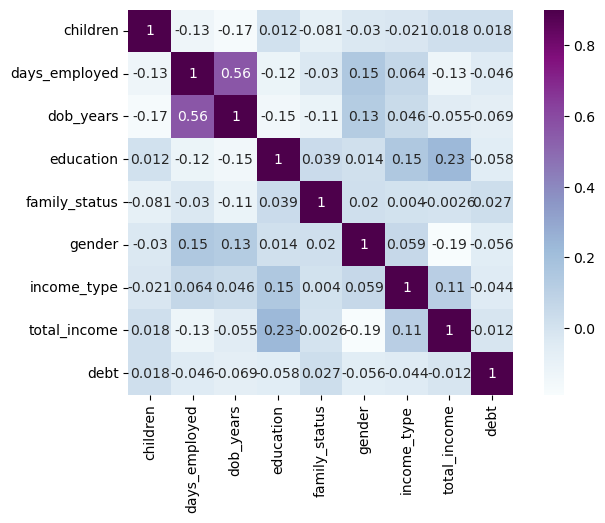

In [50]:
corrmat = df[['children', 'days_employed', 'dob_years', 'education', 'family_status', 'gender', 'income_type', 'total_income', 'debt']].corr()
plt.subplots(figsize=(8,5))
sns.heatmap(corrmat, annot=True, vmax=0.9, square=True,cmap='BuPu')
plt.show();

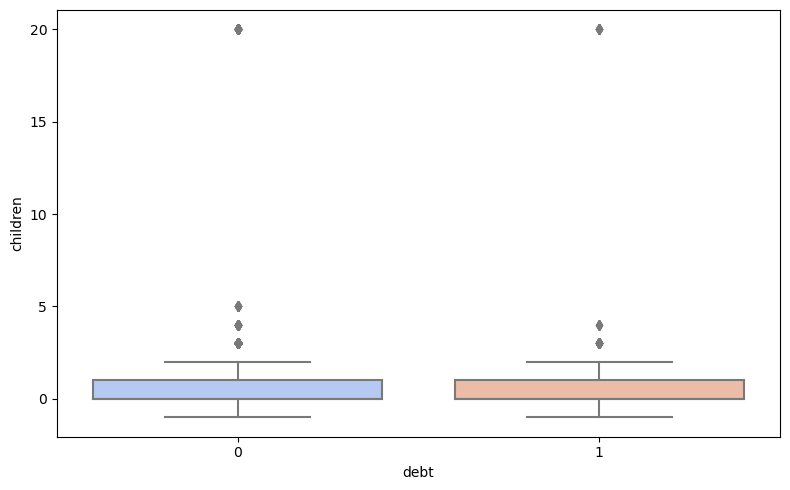

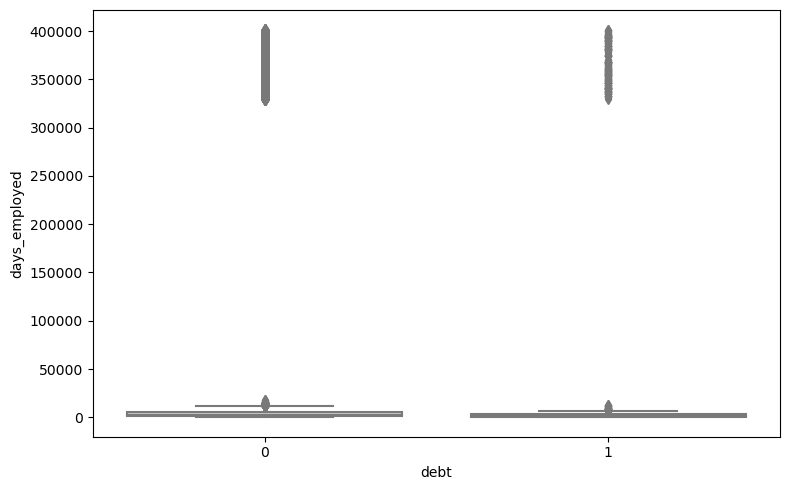

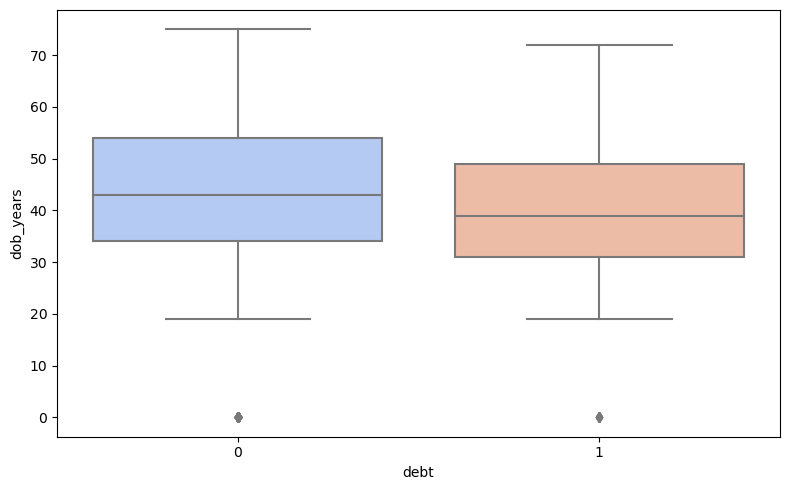

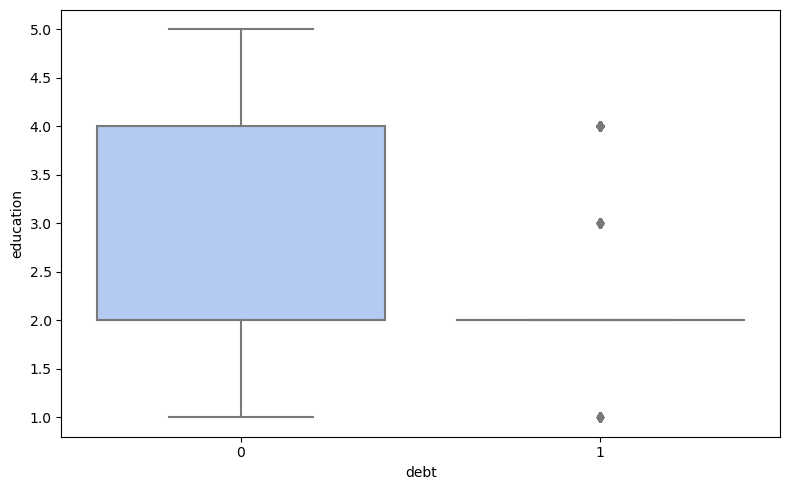

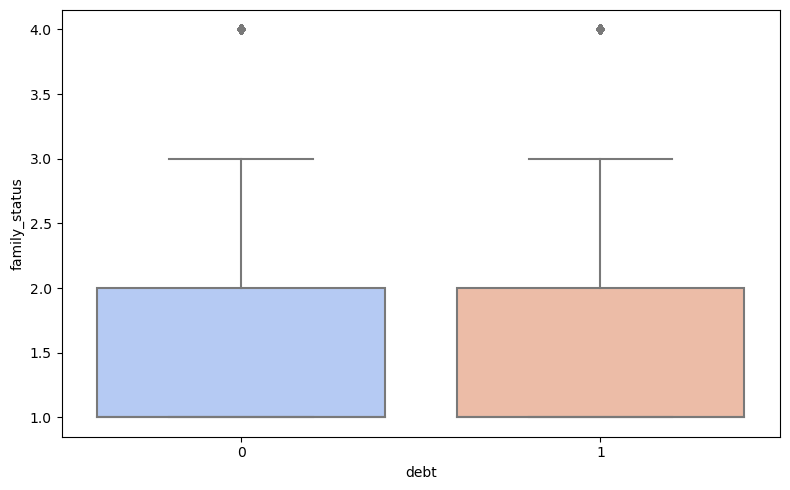

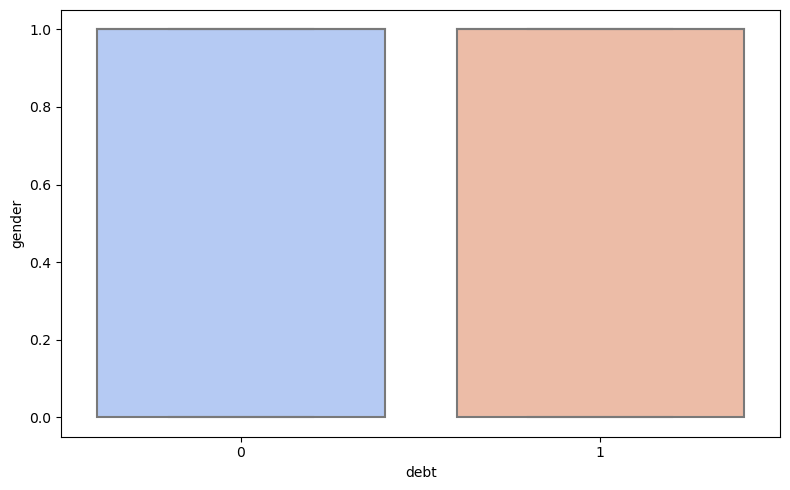

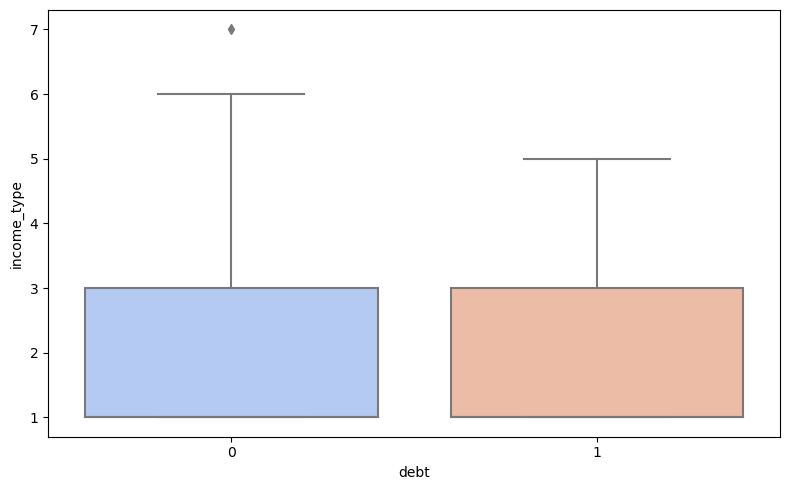

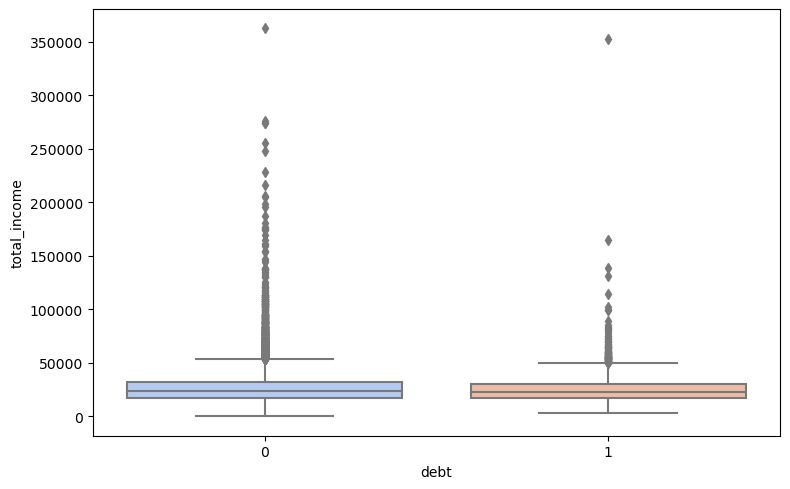

In [51]:
def boxplot(x):
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x="debt",y=df[x],palette="coolwarm")
    plt.tight_layout()
    plt.show()

feature_list = ['children', 'days_employed', 'dob_years', 'education', 'family_status', 'gender', 'income_type', 'total_income']
for i in feature_list:
    boxplot(i)

In [52]:
df['children'].value_counts()

 0     14106
 1      4809
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [53]:
df['children'] = df['children'].replace([20], 2)

In [54]:
df['children'] = df['children'].replace([-1], 1)

In [55]:
 df.children.value_counts()

0    14106
1     4856
2     2128
3      330
4       41
5        9
Name: children, dtype: int64

In [56]:
df['days_employed'].describe()

count     21470.000000
mean      61722.927466
std      134378.248011
min           0.000000
25%        1018.585522
50%        2147.139404
75%        4936.565584
max      401755.400475
Name: days_employed, dtype: float64

In [57]:
df['education'].value_counts()

2    15188
4     5251
3      743
1      282
5        6
Name: education, dtype: int64

In [58]:
df['family_status'].value_counts()

1    12922
2     4350
4     2946
3     1252
Name: family_status, dtype: int64

In [59]:
df['gender'].value_counts()

1    14189
0     7281
Name: gender, dtype: int64

In [60]:
df['income_type'].value_counts()

1    11092
3     5079
2     3837
4     1457
5        2
6        2
7        1
Name: income_type, dtype: int64

In [61]:
df['total_income'].describe()

count     21470.000000
mean      26465.340958
std       15725.769199
min           0.000000
25%       17210.644500
50%       23177.830500
75%       31606.948000
max      362496.645000
Name: total_income, dtype: float64

0    19729
1     1741
Name: debt, dtype: int64


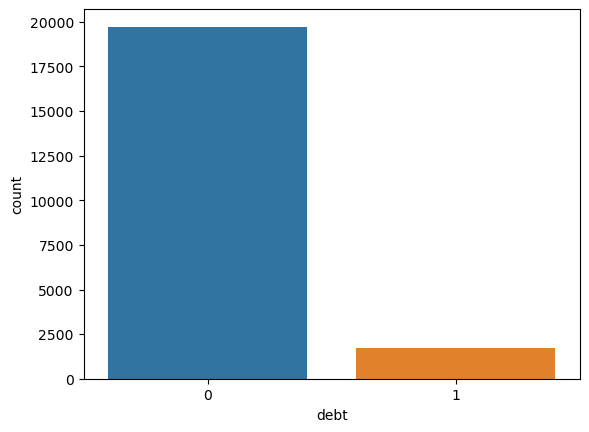

In [62]:
sns.countplot(data=df, x='debt');
print(df.debt.value_counts())

## Applying Normalization

In [63]:
transformer = MinMaxScaler()
def scaling(columns):
    return transformer.fit_transform(df[columns].values.reshape(-1,1))

columns_to_be_scaled = ['days_employed', 'total_income']
for i in columns_to_be_scaled:
    df[i] = scaling(i)
    
df.head()

,children,days_employed,dob_years,education,family_status,gender,income_type,debt,total_income
0,1,0.021002,42,4,1,1,1,0,0.112056
1,1,0.010018,36,2,1,1,1,0,0.049470
2,0,0.013997,33,2,1,0,1,0,0.064392
3,3,0.010267,32,2,1,0,1,0,0.118127
4,0,0.846948,53,2,2,1,2,0,0.070011


In [64]:
features = df.drop(['debt'], axis=1)
target = df['debt']

print(features.shape)
print(target.shape)

(21470, 8)
(21470,)


In [65]:
features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.25,random_state=123)

In [66]:
print(features_train.shape), print(target_train.shape)
print(features_test.shape), print(target_test.shape)

(16102, 8)
(16102,)
(5368, 8)
(5368,)


(None, None)

## Applying SMOTE

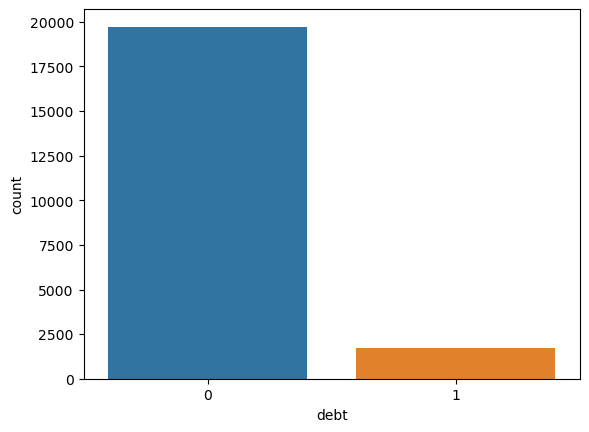

In [67]:
sns.countplot(data=df, x='debt');

In [68]:
sm = SMOTE(k_neighbors=5, random_state=123)
features_train_over, target_train_over = sm.fit_resample(features_train, target_train)
print('Before OverSampling, the shape of features_train: {}'.format(features_train.shape))
print('Before OverSampling, the shape of target_train: {}'.format(target_train.shape)) 
print('After OverSampling, the shape of features_train_over: {}'.format(features_train_over.shape))
print('After OverSampling, the shape of target_train_over: {}'.format(target_train_over.shape))

Before OverSampling, the shape of features_train: (16102, 8)
Before OverSampling, the shape of target_train: (16102,)
After OverSampling, the shape of features_train_over: (29582, 8)
After OverSampling, the shape of target_train_over: (29582,)


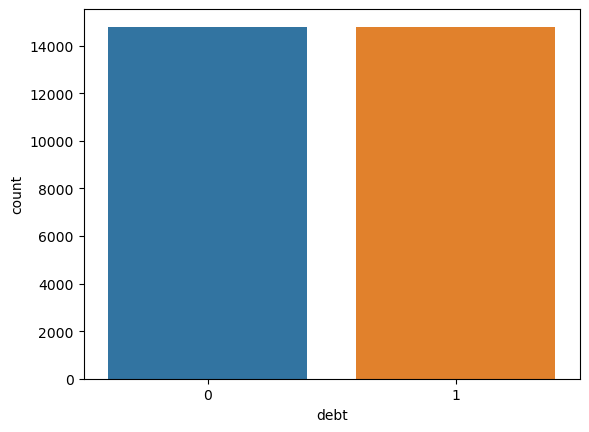

In [69]:
target_train_over_df = target_train_over.to_frame()
sns.countplot(data=target_train_over_df, x='debt');

## Logistic Regression

In [70]:
lr= LogisticRegression()
lr.fit(features_train_over,target_train_over) 
y_pred_lr = lr.predict(features_test) 

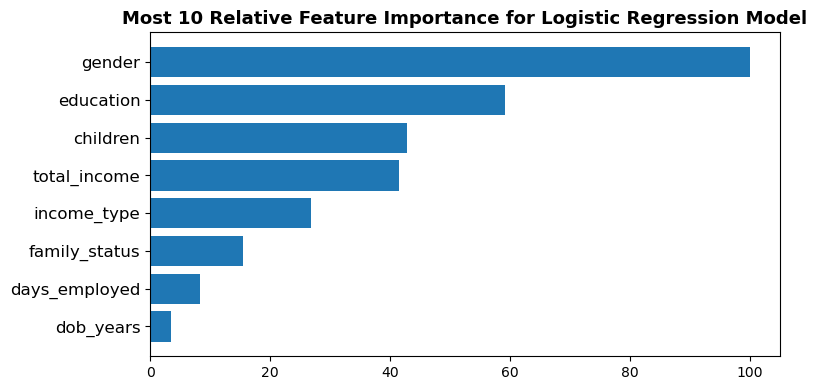

In [71]:
# Feature Importances
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())[0:10]
sorted_idx = np.argsort(feature_importance)[0:10]
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(8, 4))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
plt.title('Most 10 Relative Feature Importance for Logistic Regression Model', fontsize=13, fontweight='bold')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(features.columns)[sorted_idx], fontsize=12)

plt.tight_layout()
plt.show()

In [73]:
print("**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(target_test,y_pred_lr),5))
print('F1 score for testing set: ',round(f1_score(target_test,y_pred_lr,average='weighted'),5))
print('Recall score for testing set: ',round(recall_score(target_test,y_pred_lr,average='weighted'),5))
print('Precision score for testing set: ',round(precision_score(target_test,y_pred_lr,average='weighted'),5))
cm_lr = confusion_matrix(target_test, y_pred_lr)
print(cm_lr)

**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS **************** 
Accuracy score for testing set:  0.62798
F1 score for testing set:  0.713
Recall score for testing set:  0.62798
Precision score for testing set:  0.87066
[[3153 1785]
 [ 212  218]]


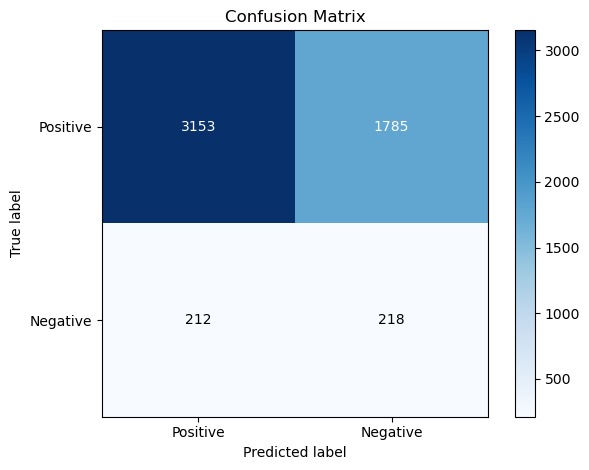

In [74]:
#Printing Confusion Matrix
class_names = ['Positive', 'Negative']
cm = confusion_matrix(target_test, y_pred_lr)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

In [76]:
# Cross Validation
accuracies = cross_val_score(estimator=lr, X=features_train, y=target_train, cv=10) 
print(f'Accuracy is:', format(accuracies.mean()*100))  #Printing the Mean of the accuracies
print(f'Standard Deviation is:',format(accuracies.std()*100)) #Printing the Standard Deviation of accuracies

Accuracy is: 91.85815684868392
Standard Deviation is: 0.017340630692051627


## Random Forest

In [78]:
# RandomForest
rf_model_final = RandomForestClassifier() # Object creation
rf_model_final.fit(features_train_over,target_train_over) # Fitting the data into the algorithm
y_pred_rf = rf_model_final.predict(features_test) # Getting the predictions

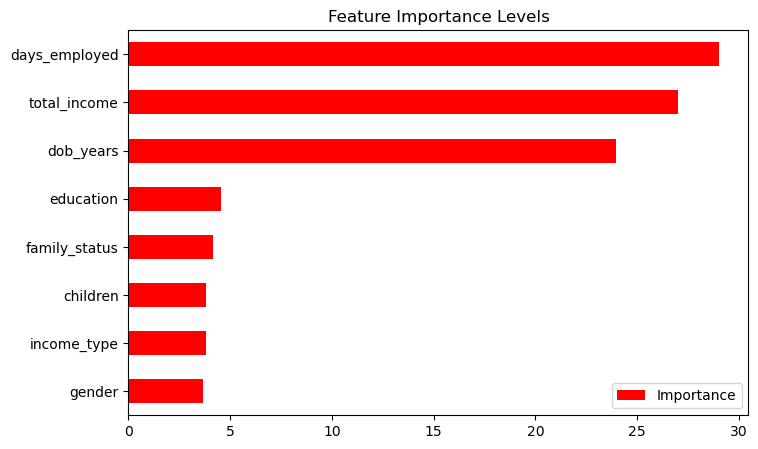

In [79]:
Importance =pd.DataFrame({"Importance": rf_model_final.feature_importances_*100},index = features_train_over.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(10).plot(kind ="barh", color = "r",figsize=(8, 5))
plt.title("Feature Importance Levels");
plt.show()

In [80]:
print("**************** RANDOM FOREST MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(target_test,y_pred_rf),5))
print('F1 score for testing set: ',round(f1_score(target_test,y_pred_rf,average='weighted'),5))
print('Recall score for testing set: ',round(recall_score(target_test,y_pred_rf,average='weighted'),5))
print('Precision score for testing set: ',round(precision_score(target_test,y_pred_rf,average='weighted'),5))
cm_rf = confusion_matrix(target_test, y_pred_rf)
print(cm_rf)

**************** RANDOM FOREST MODEL RESULTS **************** 
Accuracy score for testing set:  0.77534
F1 score for testing set:  0.81253
Recall score for testing set:  0.77534
Precision score for testing set:  0.85947
[[4060  878]
 [ 328  102]]


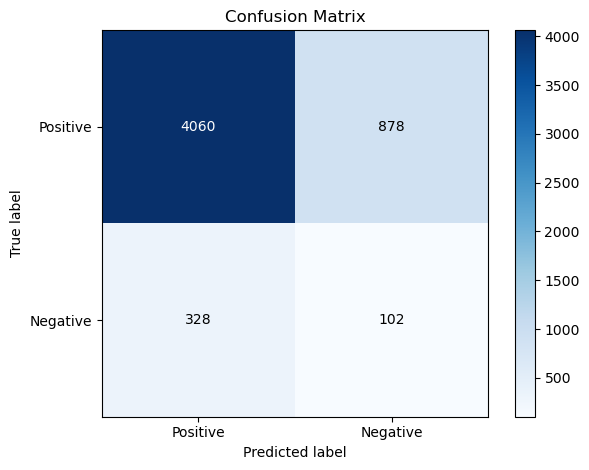

In [81]:
#Printing Confusion Matrix
class_names = ['Positive', 'Negative']
cm = confusion_matrix(target_test, y_pred_rf)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

In [82]:
# Cross Validation
accuracies = cross_val_score(estimator=rf_model_final, X=features_train, y=target_train, cv=10) 
print(f'Accuracy is:', format(accuracies.mean()*100))  #Printing the Mean of the accuracies
print(f'Standard Deviation is:',format(accuracies.std()*100)) #Printing the Standard Deviation of accuracies

Accuracy is: 91.59734897116486
Standard Deviation is: 0.17853965915035913


## XGBoost

In [87]:
from xgboost import XGBClassifier

xgbc_base = XGBClassifier(random_state=0)

xgbc_base.fit(features_train, target_train)
y_pred_xgb = xgbc_base.predict(features_test)

print('Accuracy score for testing set: ', round(accuracy_score(target_test, y_pred_xgb),4))
print('Recall score for testing set: ', round(recall_score(target_test, y_pred_xgb),4))
print('ROC_AUC score for testing set: ', round(f1_score(target_test, y_pred_xgb),4))
print('Precision score for testing set: ', round(precision_score(target_test, y_pred_xgb),4))

cm_xgb = confusion_matrix(target_test, y_pred_xgb)
print(cm_xgb)

Accuracy score for testing set:  0.9184
Recall score for testing set:  0.0023
ROC_AUC score for testing set:  0.0045
Precision score for testing set:  0.1
[[4929    9]
 [ 429    1]]


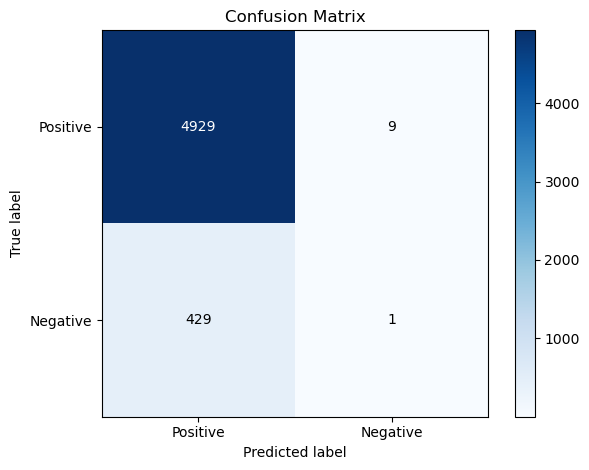

In [88]:
#Printing Confusion Matrix
class_names = ['Positive', 'Negative']
cm = confusion_matrix(target_test, y_pred_xgb)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

In [90]:
# Cross Validation
accuracies = cross_val_score(estimator=xgbc_base, X=features_train, y=target_train, cv=10) 
print(f'Accuracy is:', format(accuracies.mean()*100))  #Printing the Mean of the accuracies
print(f'Standard Deviation is:',format(accuracies.std()*100)) #Printing the Standard Deviation of accuracies

Accuracy is: 91.6594337840391
Standard Deviation is: 0.14636184453351095


## Stratified Split

In [113]:
from sklearn.model_selection import train_test_split
features_train,features_test,target_train,target_test = train_test_split(features, target, random_state=42,stratify = target, test_size = 0.2)

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

dt_classifier = DecisionTreeClassifier(max_depth = 3)
random_clf = RandomForestClassifier()

In [115]:
clf_map = {"decision tree":dt_classifier, "random":random_clf}
acc_res ={}
for name,estimator in clf_map.items():
    estimator.fit(features_train,target_train)
#     y_pred_train = estimator.predict(X_train)
    y_pred_test = estimator.predict(features_test)
#     acc_res[name] = accuracy_score(y_train,y_pred_train)
    acc_res[name] = accuracy_score(target_test,y_pred_test)


In [116]:
acc_res

{'decision tree': 0.9189566837447601, 'random': 0.915929203539823}

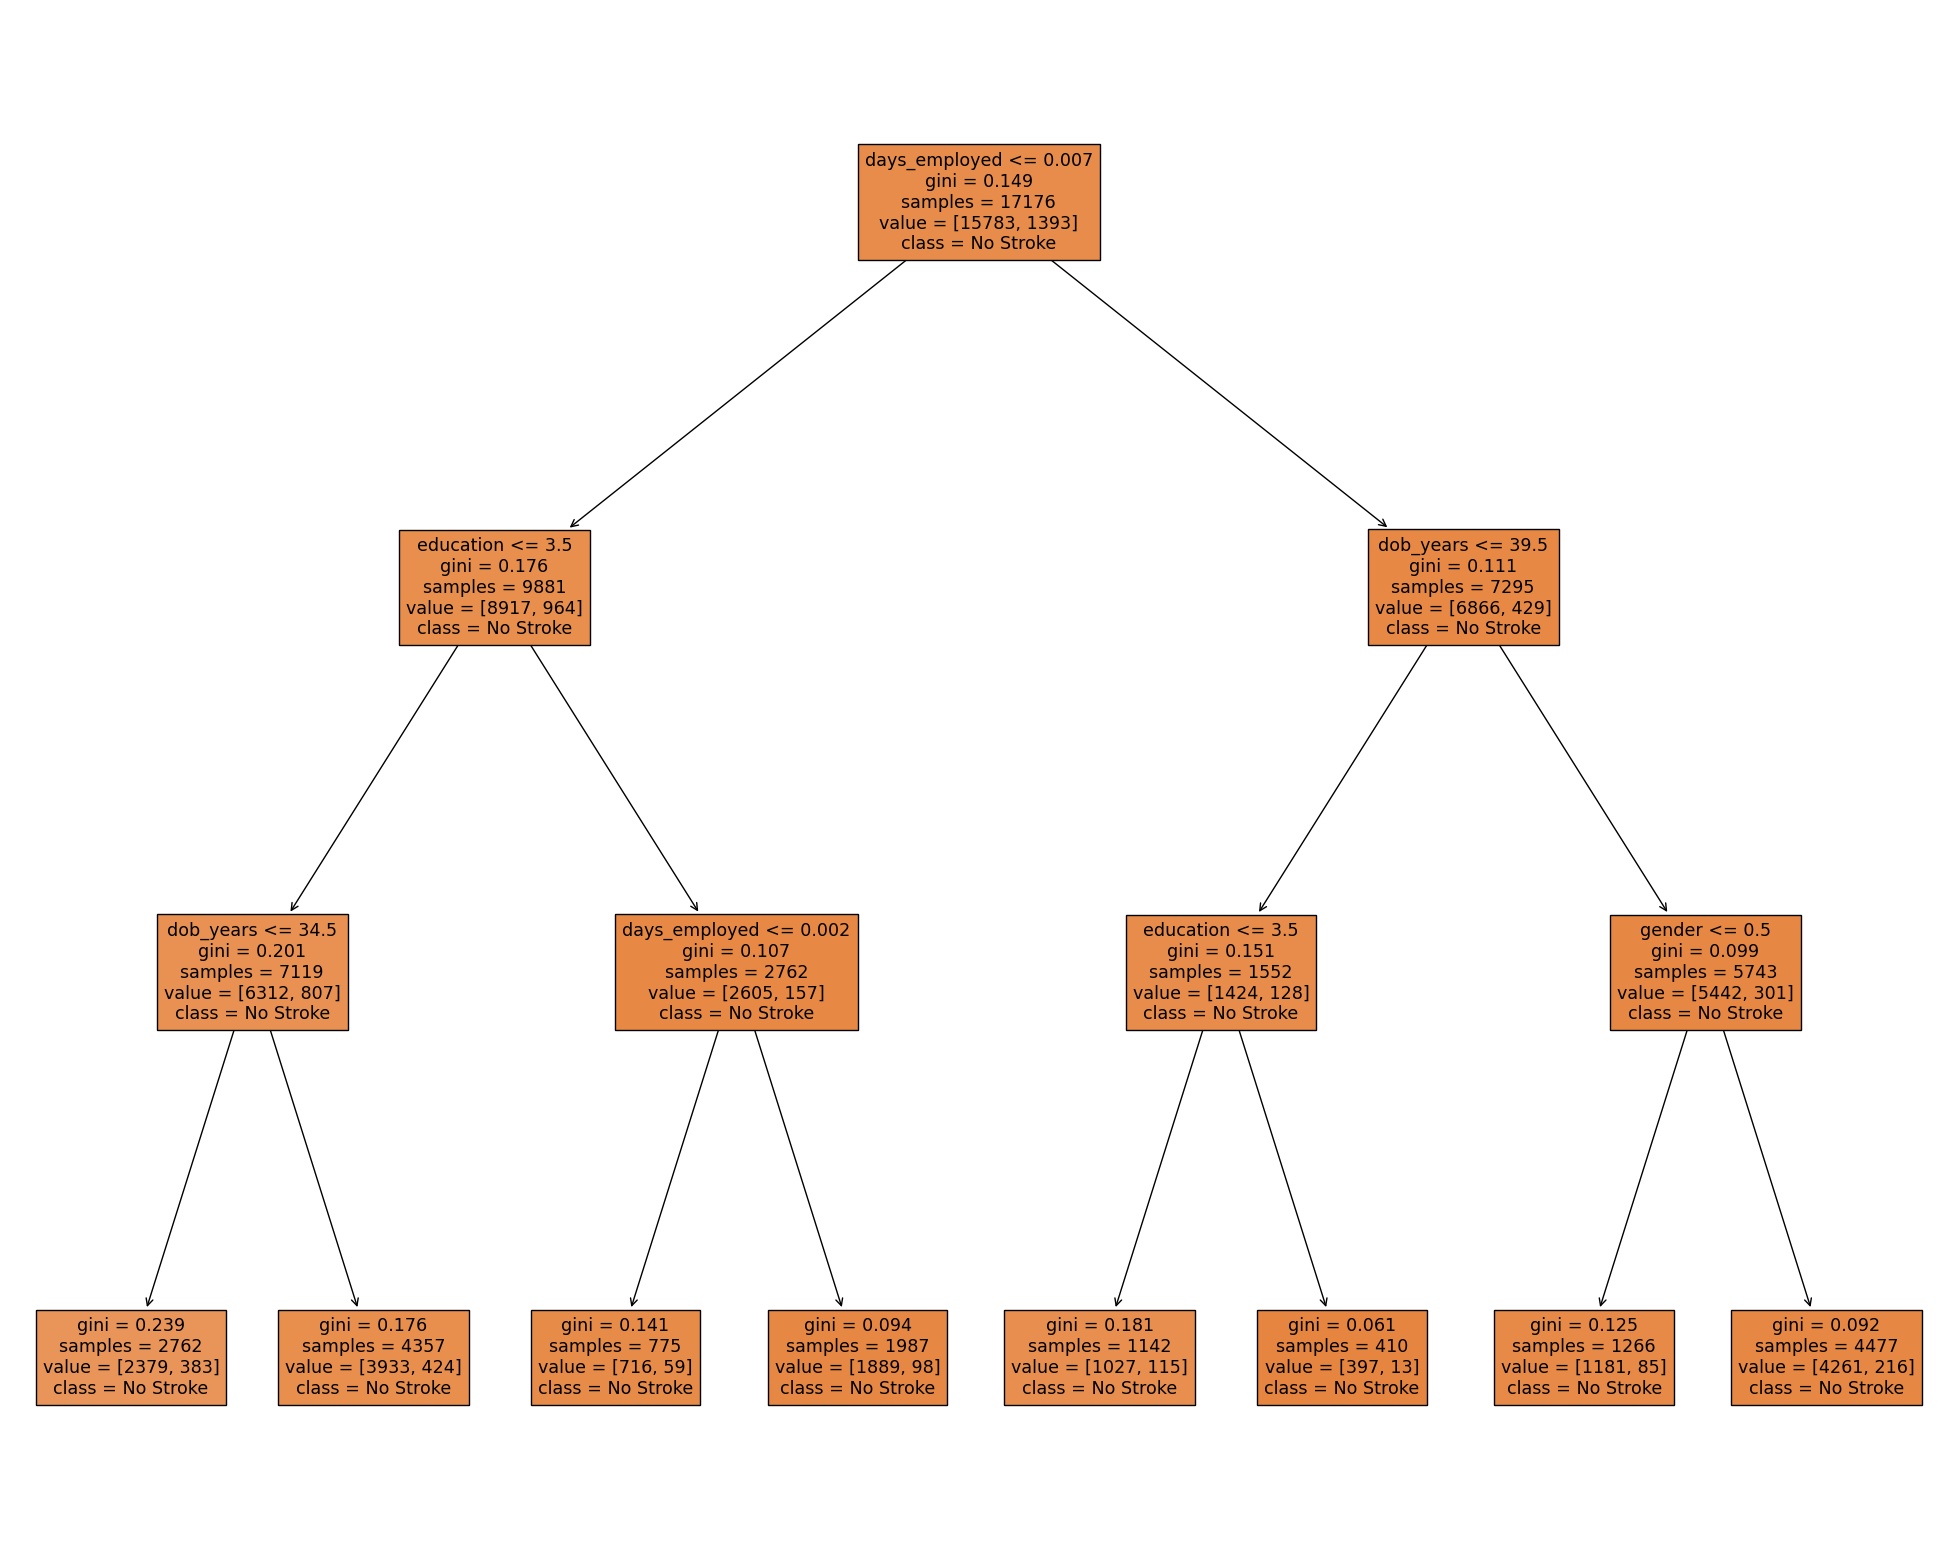

In [118]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_classifier,
                   feature_names=features.columns,
                   class_names=['No Stroke', "Stroke"],
                   filled=True)

In [119]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [120]:
grid_search = GridSearchCV(estimator=dt_classifier, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
# clf = GridSearchCV(estimator = dt_classifier, param_grid= params)
# res = clf.fit(X_train,y_train)

In [122]:
%%time
grid_search.fit(features_train, target_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 465 ms, sys: 262 ms, total: 727 ms
Wall time: 3.26 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [123]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018853,0.003050,0.004617,0.002970,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.918957,0.918957,0.918957,0.918724,0.918898,0.000101,1
1,0.019034,0.001890,0.004281,0.002372,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.918957,0.918957,0.918957,0.918724,0.918898,0.000101,1
2,0.027790,0.006039,0.002957,0.000288,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.918957,0.918957,0.918957,0.918724,0.918898,0.000101,1
3,0.019545,0.002770,0.002918,0.000104,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.918957,0.918957,0.918957,0.918724,0.918898,0.000101,1
4,0.018128,0.000923,0.003460,0.000486,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.918957,0.918957,0.918957,0.918724,0.918898,0.000101,1


In [124]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018853,0.003050,0.004617,0.002970,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.918957,0.918957,0.918957,0.918724,0.918898,0.000101,1
1,0.019034,0.001890,0.004281,0.002372,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.918957,0.918957,0.918957,0.918724,0.918898,0.000101,1
2,0.027790,0.006039,0.002957,0.000288,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.918957,0.918957,0.918957,0.918724,0.918898,0.000101,1
3,0.019545,0.002770,0.002918,0.000104,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.918957,0.918957,0.918957,0.918724,0.918898,0.000101,1
4,0.018128,0.000923,0.003460,0.000486,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.918957,0.918957,0.918957,0.918724,0.918898,0.000101,1


In [125]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)

In [126]:
dt_best = grid_search.best_estimator_

In [127]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(target_train, dt_classifier.predict(features_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(target_train, dt_classifier.predict(features_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(target_test, dt_classifier.predict(features_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(target_test, dt_classifier.predict(features_test)))

In [128]:
evaluate_model(dt_best)

Train Accuracy : 0.9188984629715883
Train Confusion Matrix:
[[15783     0]
 [ 1393     0]]
--------------------------------------------------
Test Accuracy : 0.9189566837447601
Test Confusion Matrix:
[[3946    0]
 [ 348    0]]
